In [14]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df_trialdata = pd.merge(df_trial, df_mouse, on =["Mouse ID","Mouse ID"], how = 'left')

# Display the data table for preview
df_trialdata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [15]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_TumorMean = df_trialdata.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":"mean"})
df_TumorSEM = df_trialdata.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":"sem"})

# Convert to DataFrame
df_TumorMean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [16]:
# Minor Data Munging to Re-Format the Data Frames
df_TumorMeanPiv = df_TumorMean.unstack("Drug")
df_TumorSEMPiv = df_TumorSEM.unstack("Drug")

#drop top level of pivot index
df_TumorMeanPiv.columns = df_TumorMeanPiv.columns.droplevel(0)
df_TumorSEMPiv.columns = df_TumorSEMPiv.columns.droplevel(0)

# Preview that Reformatting worked
df_TumorMeanPiv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


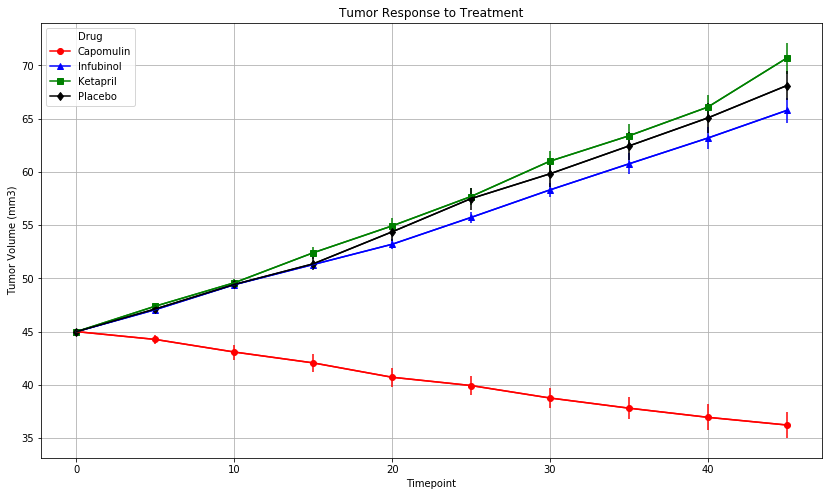

In [17]:
#Define Drugs and marker styles for graphs
SelectedDrugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors = ['r','b','g','k']
markers = ["ro-","b^-","gs-","kd-"] 


# Generate the Plot (with Error Bars)
ax = df_TumorMeanPiv[SelectedDrugs].plot(kind="line", figsize=[14,8],yerr=df_TumorSEMPiv,color = colors, legend = False )
ax.set_xlabel('Time (days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor Response to Treatment')

#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)

#plot the markers
df_TumorMeanPiv[SelectedDrugs].plot(style=markers,grid=True, ax = ax)

# Save the Figure
plt.savefig("F1.Tumor Response to Treatment.png")
plt.show()

## Metastatic Response to Treatment

In [18]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df_MetMean = df_trialdata.groupby(["Drug","Timepoint"]).agg({"Metastatic Sites":"mean"})

# Preview DataFrame
df_MetMean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [19]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
df_MetSem = df_trialdata.groupby(["Drug","Timepoint"]).agg({"Metastatic Sites":"sem"})

# Preview DataFrame
df_MetSem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [20]:
# Minor Data Munging to Re-Format the Data Frames
df_MetMeanPiv = df_MetMean.unstack("Drug")
df_MetSemPiv = df_MetSem.unstack("Drug")

#drop top level of pivot index
df_MetMeanPiv.columns = df_MetMeanPiv.columns.droplevel(0)
df_MetSemPiv.columns = df_MetSemPiv.columns.droplevel(0)

# Preview that Reformatting worked
df_MetMeanPiv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


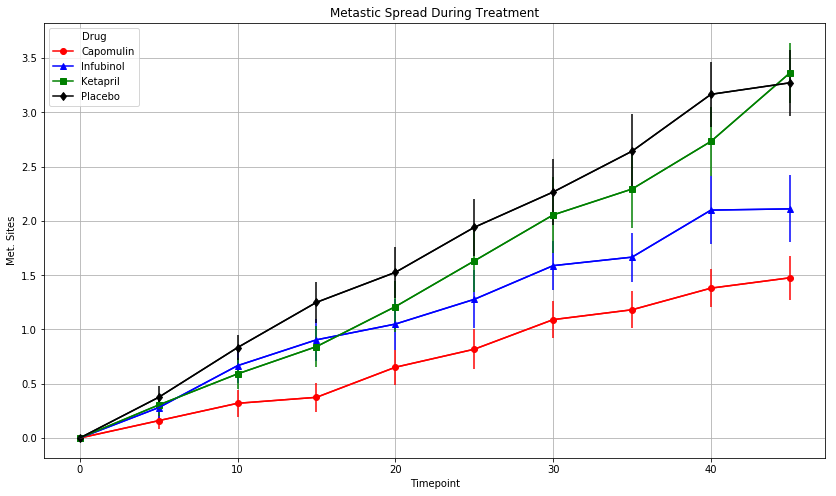

In [21]:

# Generate the Plot (with Error Bars)
ax2 = df_MetMeanPiv[SelectedDrugs].plot(kind="line", figsize=[14,8],yerr=df_MetSemPiv,color = colors, legend = False )
ax2.set_xlabel('Treatment Duration (days)')
ax2.set_ylabel('Met. Sites')
ax2.set_title('Metastic Spread During Treatment')

#reset color cycle so that the marker colors match
ax2.set_prop_cycle(None)

#plot the markers
df_MetMeanPiv[SelectedDrugs].plot(style=markers,grid=True, ax = ax2)


# Save the Figure
plt.savefig("F2.Metastic Spread During Treatment.png")

## Survival Rates

In [22]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_Mice = df_trialdata.groupby(["Drug","Timepoint"]).agg({"Mouse ID":"count"})

# Preview DataFrame
df_Mice.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [23]:
# Minor Data Munging to Re-Format the Data Frames
df_MicePiv = df_Mice.unstack("Drug")

#drop top level of pivot index
df_MicePiv.columns = df_MicePiv.columns.droplevel(0)
df_MicePiv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


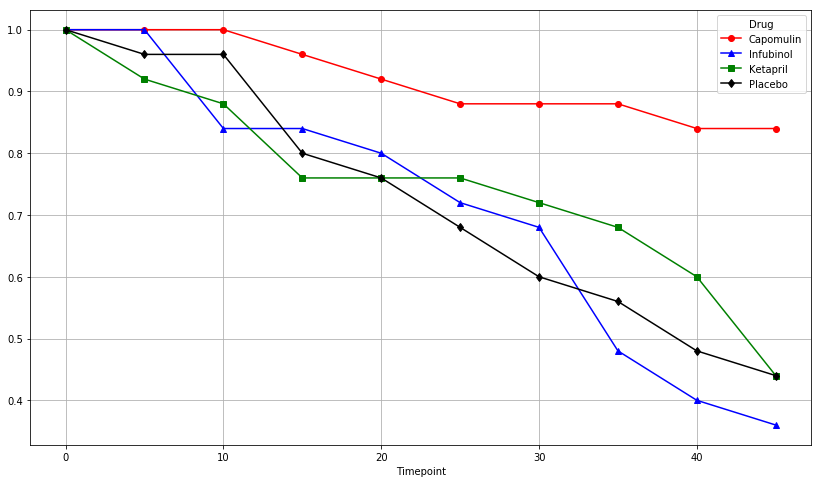

In [24]:
# Generate the Plot (Accounting for percentages)
df_MicePivPct = df_MicePiv/df_MicePiv[SelectedDrugs].iloc[0]

df_MicePivPct[SelectedDrugs].plot(figsize=[14,8],grid=True, colormap='jet' ,style=markers)

# Save the Figure
plt.savefig("F3.Survival During Treatment.png")
# Show the Figure
plt.show()


## Summary Bar Graph

In [25]:
# Calculate the percent changes for each drug
pct =(df_TumorMeanPiv.iloc[-1]-df_TumorMeanPiv.iloc[0])*100/df_TumorMeanPiv.iloc[0]
# Display the data to confirm
pct

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

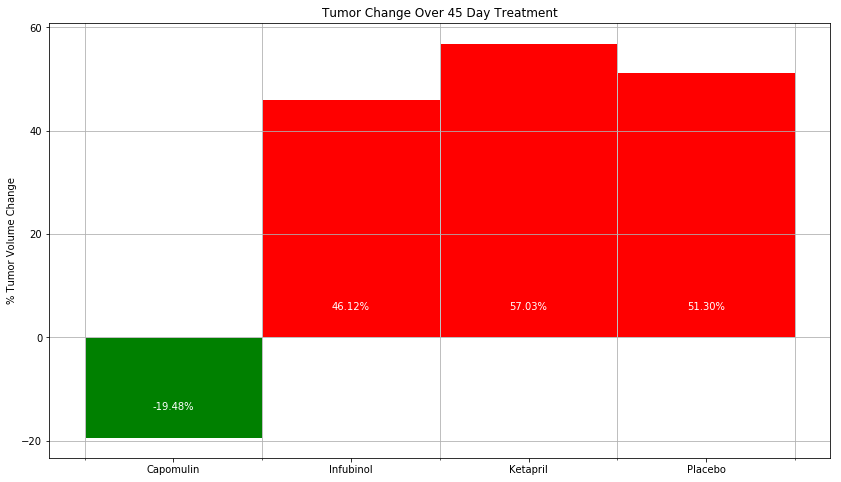

In [29]:
# Store all Relevant Percent Changes into a Tuple
percent = pd.DataFrame({"Drug":pct.loc[SelectedDrugs].index,"Percent":pct.loc[SelectedDrugs].values})
percent["Positive"] = ""
percent["Negative"] = ""


# Splice the data between passing and failing drugs
for index, row in percent.iterrows():
    #print(index)
    #print(row["Drug"])
    #print(row["Percent"])
    if row["Percent"] < 0:
        percent["Negative"].iloc[index] = percent["Percent"].iloc[index]
        percent["Positive"].iloc[index]= 0
    else:
        percent["Negative"].iloc[index] = 0
        percent["Positive"].iloc[index] =percent["Percent"].iloc[index]
percent.head()

negative_data = percent["Negative"]
positive_data = percent["Positive"]

#Plot data

fig4 = plt.figure()
ax4 = plt.subplot(1,1,1)

ax4.bar(percent["Drug"], negative_data, width=1, color='g',edgecolor="w")
ax4.bar(percent["Drug"], positive_data, width=1, color='r',edgecolor="w")


# Orient widths. Add labels, tick marks, etc. 
ax4.set_yticks(np.arange(-20,80,step=20))
ax4.set_xticks(np.arange(-.5,len(SelectedDrugs),step=1), minor =True)
ax4.grid(axis = "x",which="minor")
ax4.grid(axis = "y",which="major")
ax4.set_title("Tumor Change Over 45 Day Treatment")
ax4.set_ylabel("% Tumor Volume Change")

fig4.set_size_inches(14,8)
# Use functions to label the percentages of changes

# Make some labels.
labels = ["%.2f%%" % percent["Percent"].iloc[i] for i in range(len(SelectedDrugs))]

# Call functions to implement the function calls

rects = ax4.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax4.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom',color="white")
# Save the Figure

fig4.savefig("F4.Tumor Change Over 45 Day Treatment.png")
# Show the Figure
fig4.show()

## Conclusion

Three drugs were chosen by the data gods to be tracked for this excercise (Capomulin, Infubinol, Ketapril), in addition to the trusty Placebo. 

Our first graph, Tumor Response to Treatment, shows that Capomulin had a promsing affect on the tumors. It was the only drug out of the seleced drugs to show a decline in the tumor volume throughout the length of the trial. The remining two (Infubinol and Ketapril) trended similarly to the Placebo, indicating the drugs likely did not have an affect on the tumors. 

The second graph, Metastic Spread During Treatment, shows Capomulin still leading the pack with the slowest spread of metastic sites over the trial period. While the spread still occured, it was slower than the others. The Placebo had the highest rate of increase, with the remaining two somewhere inbetween Capomulin and the Placebo. 

The third graph tracked the survival rate of the mice throughout the trial. Once again, Capomulin stands out from the others, with the best survival rate of the selected drugs. By the end of the trial, Capomulin still had over 80% of it's inital population of mice, whereas all the rest were below 50%. 

Our last graph, Tumor Change Over 45 Day Treatment, gave us an additional layer of analysis of our first, akin to a summary. This showed the overall percent change of the average tumor volume for the trial period. The conditional formatting lets us clearly see what we've already observed thus far, that the Capomulin had a favorable affect on the tumors overtime. 

#GoCapomulin